In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import matplotlib as mlp
import warnings

def set_visualization_settings():

    plt.style.use('dark_background')

    mlp.rcParams['lines.linewidth'] = 2

    mlp.rcParams['xtick.major.size'] = 12
    mlp.rcParams['xtick.major.width'] = 2
    mlp.rcParams['xtick.labelsize'] = 10
    mlp.rcParams['xtick.color'] = '#FF5533'

    mlp.rcParams['ytick.major.size'] = 12
    mlp.rcParams['ytick.major.width'] = 2
    mlp.rcParams['ytick.labelsize'] = 10
    mlp.rcParams['ytick.color'] = '#FF5533'

    mlp.rcParams['axes.labelsize'] = 10
    mlp.rcParams['axes.titlesize'] = 16
    mlp.rcParams['axes.titlecolor'] = '#00B050'
    mlp.rcParams['axes.labelcolor'] = '#00B050'

    warnings.filterwarnings('ignore')

from sklearn.decomposition import PCA

class PCAResultVisualizer:

    """
    Класс для визуализации и понижения пространства (PCA)
    """
        
    def __init__(self, X, Y, n_components):
        self.X = X.subtract(X.mean())  # Центрируем данные
        self.Y = Y
        self.n_components = n_components
        self.fit_transform() 

    def fit_transform(self):
        self.pca = PCA(n_components=self.n_components)
        PCA_dataset = self.pca.fit_transform(self.X)
        self.PCA_dataset = pd.DataFrame(PCA_dataset, columns=[f'PCA_{i+1}' for i in range(self.n_components)])
        return self.PCA_dataset

    def plot_correlation_heatmap(self):
        corrs = pd.DataFrame()
        for i in range(self.n_components):
            component_corr = self.X.corrwith(self.PCA_dataset[f'PCA_{i+1}'])
            corrs[f'PCA_{i+1}'] = component_corr

        corrs.columns = [f'PCA_{i+1}' for i in range(self.n_components)]
        fig = plt.figure(figsize=(16, 12))
        hm = sns.heatmap(corrs, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, yticklabels=corrs.index, xticklabels=corrs.columns)
        plt.title('Features Correlation Heatmap')
        plt.tight_layout()
        plt.show()

    def plot_PCA(self):

        if self.n_components == 2:

            fig, ax = plt.subplots(figsize=(16, 10))
            for label in self.Y.unique():
                subset = self.PCA_dataset[self.Y == label]
                ax.scatter(subset['PCA_1'], subset['PCA_2'], label=label)
            ax.legend(title=self.Y.name)
            ax.set_xlabel('PCA_1')
            ax.set_ylabel('PCA_2')

        elif self.n_components == 3:
            
            PCA_dataset_3d = pd.concat((self.PCA_dataset, self.Y), axis=1)
            fig = plt.figure(figsize=(16, 14))
            ax = fig.add_subplot(111, projection='3d')

            unique_labels = self.Y.unique()
            colors = sns.color_palette('hsv', len(unique_labels))

            for label, color in zip(unique_labels, colors):
                subset = PCA_dataset_3d[PCA_dataset_3d[self.Y.name] == label]
                ax.scatter3D(subset['PCA_1'], 
                                subset['PCA_2'], 
                                subset['PCA_3'],
                                c=[color],
                                label=label)

            ax.set_xlabel('PCA 1')
            ax.set_ylabel('PCA 2')
            ax.set_zlabel('PCA 3')

            ax.legend(loc='best', title=self.Y.name)
            plt.show()

        else:
            print("Unsupported number of PCA components for visualization.")


from sklearn.manifold import TSNE

class TSNEResultVisualizer:
    """
    Класс для визуализации и понижения пространства (t-SNE)
    """
        
    def __init__(self, X, Y, n_components, random_state=42):
        self.X = X
        self.Y = Y
        self.n_components = n_components
        self.random_state = random_state
        self.fit_transform() 

    def fit_transform(self):
        self.tsne = TSNE(n_components=self.n_components, random_state=self.random_state)
        TSNE_dataset = self.tsne.fit_transform(self.X)
        self.TSNE_dataset = pd.DataFrame(TSNE_dataset, columns=[f'TSNE_{i+1}' for i in range(self.n_components)])
        return self.TSNE_dataset

    def plot_TSNE(self):
        if self.n_components == 2:
            fig, ax = plt.subplots(figsize=(16, 10))
            for label in self.Y.unique():
                subset = self.TSNE_dataset[self.Y == label]
                ax.scatter(subset['TSNE_1'], subset['TSNE_2'], label=label)
            ax.legend(title=self.Y.name)
            ax.set_xlabel('t-SNE Component 1')
            ax.set_ylabel('t-SNE Component 2')
            plt.show()

        elif self.n_components == 3:
            TSNE_dataset_3d = pd.concat((self.TSNE_dataset, self.Y), axis=1)
            fig = plt.figure(figsize=(16, 14))
            ax = fig.add_subplot(111, projection='3d')

            unique_labels = self.Y.unique()
            colors = sns.color_palette('hsv', len(unique_labels))

            for label, color in zip(unique_labels, colors):
                subset = TSNE_dataset_3d[TSNE_dataset_3d[self.Y.name] == label]
                ax.scatter3D(subset['TSNE_1'], 
                             subset['TSNE_2'], 
                             subset['TSNE_3'],
                             c=[color],
                             label=label)

            ax.set_xlabel('t-SNE Component 1')
            ax.set_ylabel('t-SNE Component 2')
            ax.set_zlabel('t-SNE Component 3')
            ax.legend(loc='best', title=self.Y.name)
            plt.show()

        else:
            print("Unsupported number of t-SNE components for visualization.")

def get_redundant_pairs(df):
    """
    Функция для определения пар признаков, для которых корреляция уже была рассчитана.

    Параметры:
    - df: DataFrame, содержащий признаки.

    Возвращает:
    - pairs_to_drop: множество, содержащее пары признаков, для которых корреляция уже была рассчитана.
    """
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    """
    Функция для получения верхних абсолютных корреляций между признаками в DataFrame.

    Параметры:
    - df: DataFrame, содержащий признаки.
    - n: int, количество верхних корреляций для возврата (по умолчанию 5).

    Возвращает:
    - au_corr[:n]: Series, содержащий верхние абсолютные корреляции между признаками.
    """
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[:n]

def print_top_abs_correlations(df, n=5):
    """
    Функция для вывода верхних абсолютных корреляций между признаками в DataFrame.

    Параметры:
    - df: DataFrame, содержащий признаки.
    - n: int, количество верхних корреляций для вывода (по умолчанию 5).
    """
    print("Top Absolute Correlations:")
    top_corr = get_top_abs_correlations(df, n).reset_index()
    top_corr.columns = ['Feature 1', 'Feature 2', 'Correlation']
    print(top_corr)

# ==============================================================>>

# Удаление признаков, в которых корреляция превышает threshold

def remove_highly_correlated_features(dataset, threshold):
    """
    Удаляет признаки с высокой корреляцией из датасета.

    Параметры:
    - dataset: DataFrame, исходный датасет.
    - threshold: float, порог корреляции, при котором признаки будут удалены.

    Возвращает:
    - dataset: DataFrame, датасет с удаленными признаками.
    """
    col_corr = set()  # Множество названий удаленных столбцов
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i]  # Получение названия столбца
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname]  # Удаление столбца из датасета
    return dataset

### Загрузим уже обработанные в прошлом ДЗ данные!

In [135]:
df = pd.read_csv('../data/processed_sigma.csv')
df = df.drop("Trip_ID", axis=1)

X = df.drop("Surge_Pricing_Type", axis=1)
y = df["Surge_Pricing_Type"]

In [3]:
df

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Type_of_Cab_B,Type_of_Cab_C,...,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Male,Surge_Pricing_Type
0,6.77,1.0,2.42769,3.90500,0,40.0,46,60,1,0,...,0,0,0,0,0,0,0,0,0,2
1,29.47,10.0,2.78245,3.45000,0,38.0,56,78,1,0,...,0,0,0,0,0,0,0,0,1,2
2,41.58,10.0,2.79805,3.50125,2,61.0,56,77,1,0,...,0,0,0,0,0,0,0,0,1,2
3,61.56,10.0,2.79805,3.45375,0,61.0,52,74,0,1,...,0,0,0,0,0,0,0,0,1,3
4,54.95,10.0,3.03453,3.40250,4,51.0,49,102,0,1,...,0,0,0,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131657,11.72,1.0,2.74229,3.28500,0,61.0,47,76,0,0,...,0,0,0,0,0,0,0,0,1,3
131658,74.81,7.0,2.81059,0.44500,0,61.0,63,88,0,1,...,0,0,0,0,0,0,0,0,1,2
131659,40.17,10.0,2.99565,3.33625,0,61.0,48,75,0,1,...,0,0,0,0,0,0,0,0,0,2
131660,46.88,4.0,3.04744,4.15750,1,47.0,54,79,1,0,...,0,0,0,0,0,0,0,0,1,2


### Principal component analysis (PCA)

**Задание 1.** Спроецируйте данные на двумерную плоскость, используя `PCA`. Другими словами, выделите первые две главные компоненты и изобразите данные в осях этих компонент. Не забудьте центрировать признаки перед применением метода. 

**Какую долю изначальной дисперсии (информации) содержат/объясняют в себе обе компоненты?** Для этого воспользуйтесь атрибутом `explained_variance_ratio_` у PCA-класса.

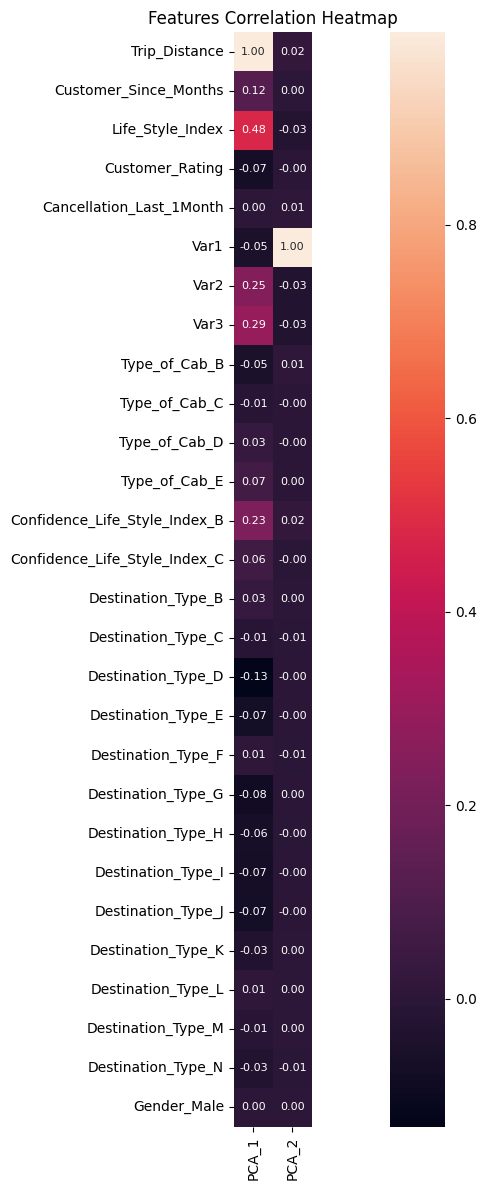

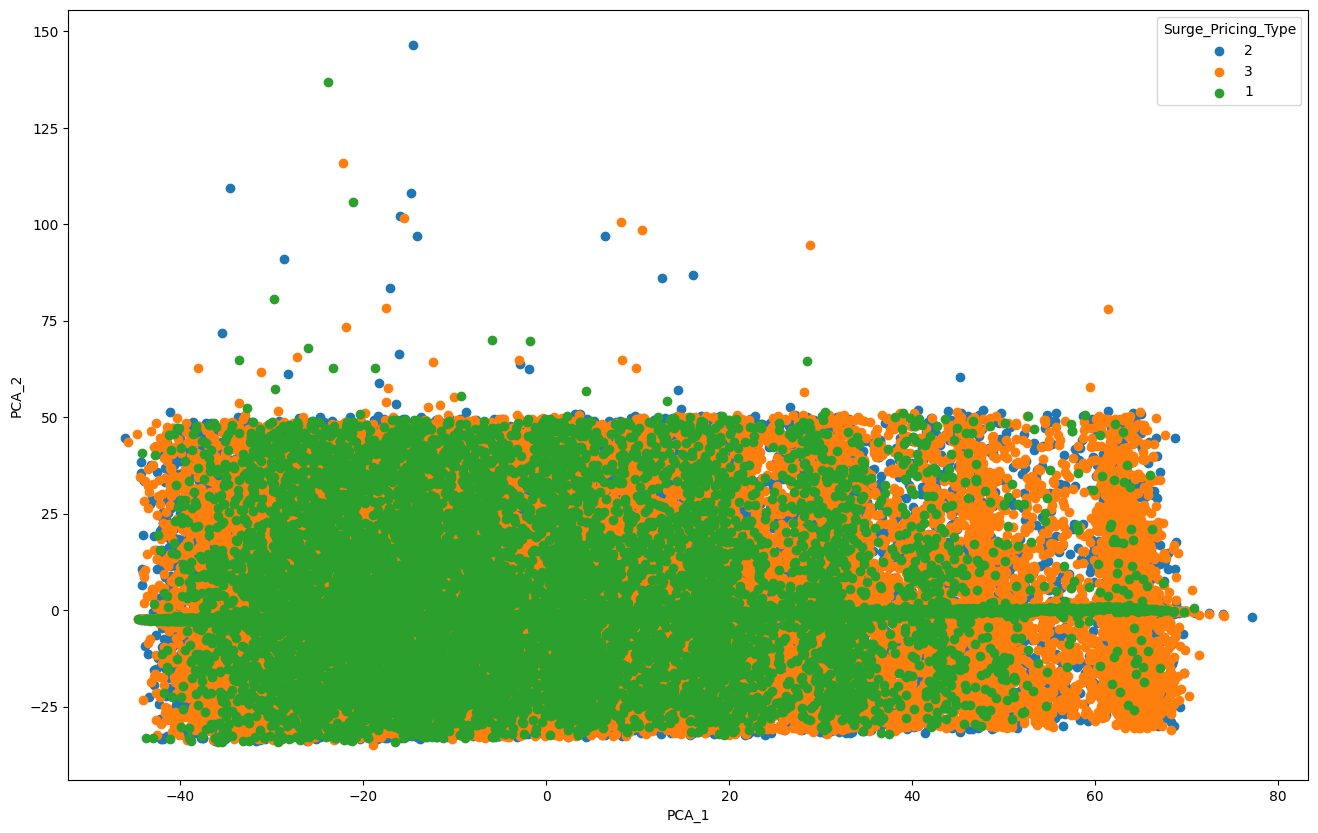

In [24]:
from sklearn.decomposition import PCA

### Your code is here

pcv = PCAResultVisualizer(X, y, n_components=2)
pcv.plot_correlation_heatmap()
pcv.plot_PCA()


In [28]:
pcv.pca.explained_variance_ratio_

array([0.63176117, 0.21129863])

**Задание 2.** Изобразите heatmap корреляции изначальных признаков с новыми двумя главными компонентами. \
**Какие признаки коррелируют с первой компонентой? Какие со второй? В качестве порогового значения договоримся о корреляции >= 0.5 по абсолютному значению **


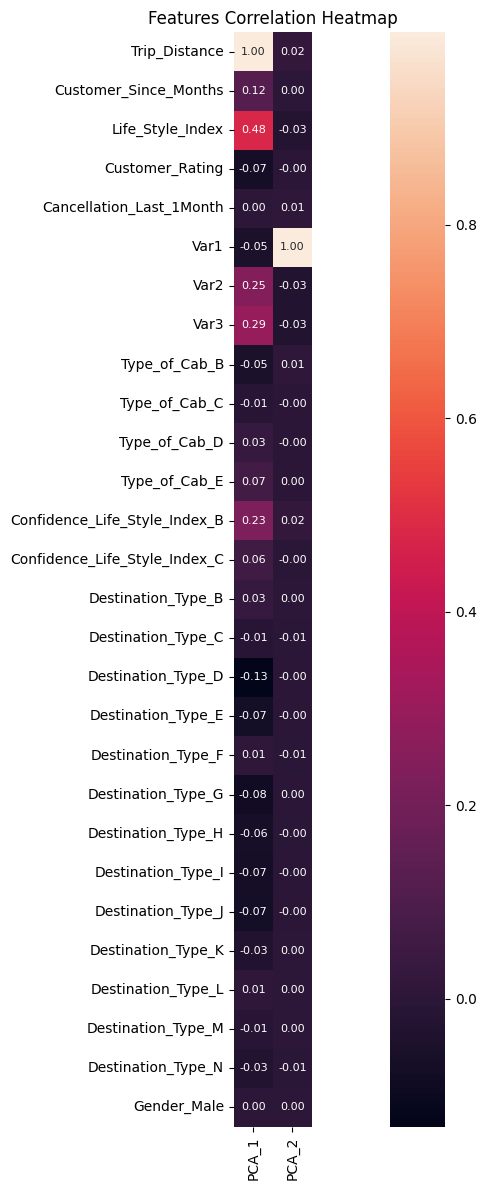

In [30]:
### Your code is here

pcv.plot_correlation_heatmap()

**Задание 3.** Изобразите двумерную проекцию данных с метками классов. Выделите третью главную компоненту и аналогично нарисуйте трехмерную проекцию с метками классов. \
**Какие признаки коррелируют с третьей компонентой?**

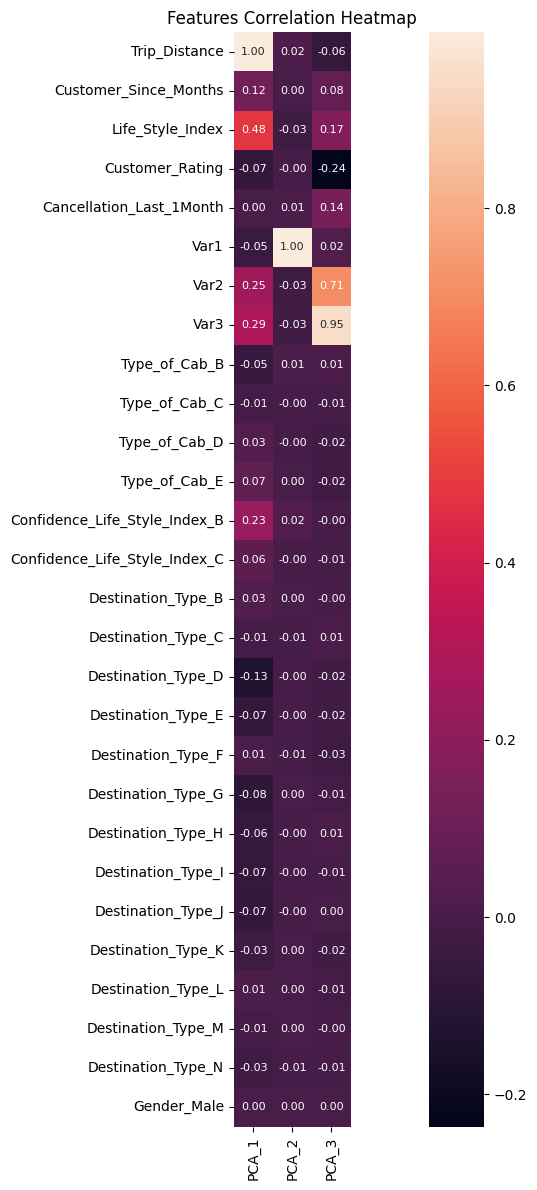

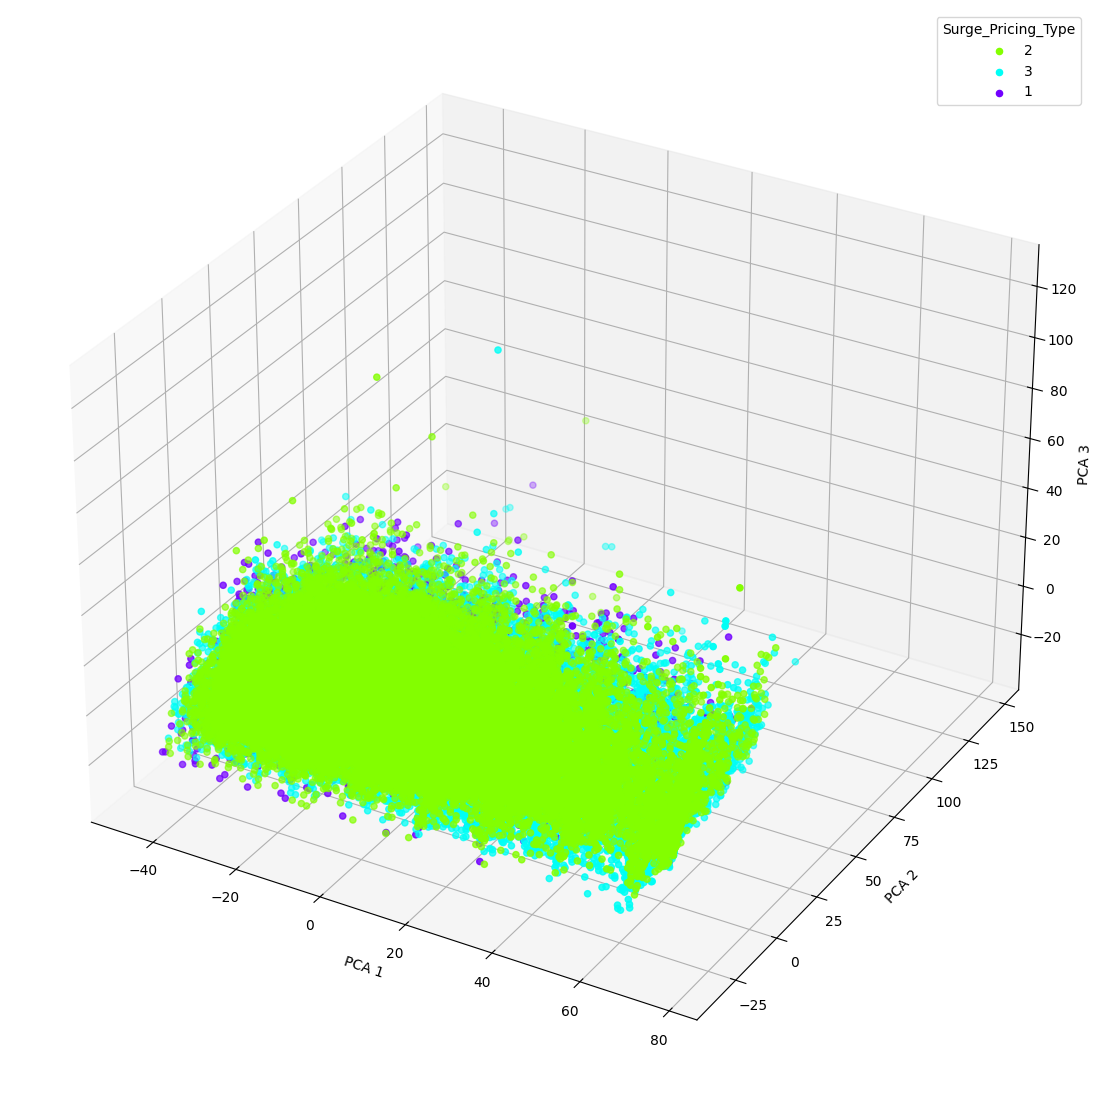

In [31]:
### Your code is here

pcv_3d = PCAResultVisualizer(X, y, n_components=3)
pcv_3d.plot_correlation_heatmap()
pcv_3d.plot_PCA()

Советуем еще и замерить попарные корреляции между главными компонентами! Это поможет в ответе на один из тестовых вопросов.

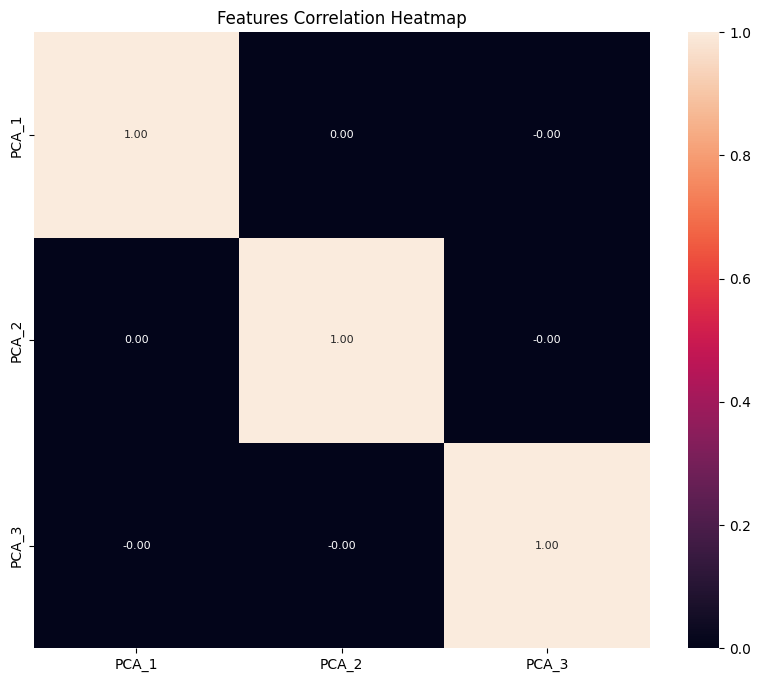

In [46]:
### Your code is here

cm = np.corrcoef(pcv_3d.PCA_dataset.values.T)
fig = plt.figure(figsize=(10, 8))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, yticklabels=pcv_3d.PCA_dataset.columns, xticklabels=pcv_3d.PCA_dataset.columns)
plt.title('Features Correlation Heatmap')
plt.show()

**Задание 4.** Обучите логистическую регрессию на первых двух компонентах центрированных данных и подберите гиперпараметры. Обучите логистическую регрессию на центрированных данных и подберите гиперпараметры. **Сравните метрику accuracy и f1-score на тестовой выборке в двух моделях**.

P.S. для удобства, скорости и нормализации данных (понадобится, так как захотим повалидироваться на параметрах регуляризации) можно построить конструкцию Pipeline c 3 следующими степами: StandardScaler -> PCA -> LogisticRegression

In [88]:
np.random.seed(2022)
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [93]:
X_centered = X.subtract(X.mean())

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X_centered, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)

In [95]:
### Проверка на сбалансированность классов
df.groupby('Surge_Pricing_Type').size()

Surge_Pricing_Type
1    27214
2    56728
3    47720
dtype: int64

In [96]:
### Your code is here

pipe_PCA_2d = Pipeline([
    ("scaler", StandardScaler()),
    ("PCA", PCA(n_components=2)),
    ("LR", LogisticRegression())
])

param_grid_PCA_2d = {
    'LR__penalty': ['l1', 'l2', 'elasticnet'],
    'LR__C': [1e-5, 0.0001, 0.001, 0.01]
}

grid_search_PCA_2d = GridSearchCV(
                            pipe_PCA_2d,
                            param_grid_PCA_2d,
                            cv=5,
                            scoring="accuracy"
                           )

grid_search_PCA_2d.fit(X_train, y_train)

# Вывод лучших параметров и оценки
print("Лучшие параметры:", grid_search_PCA_2d.best_params_)
print("Лучшая оценка:", grid_search_PCA_2d.best_score_)

Лучшие параметры: {'LR__C': 0.0001, 'LR__penalty': 'l2'}
Лучшая оценка: 0.480931189349878


In [97]:
LR_PCA_2d = grid_search_PCA_2d.best_estimator_

In [99]:
print(classification_report(y_test, LR_PCA_2d.predict(X_test), digits=3))

              precision    recall  f1-score   support

           1      0.000     0.000     0.000      5372
           2      0.477     0.696     0.567     11349
           3      0.495     0.503     0.499      9612

    accuracy                          0.484     26333
   macro avg      0.324     0.400     0.355     26333
weighted avg      0.386     0.484     0.426     26333



In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)

In [84]:
### Your code is here

pipe_LR = Pipeline([
    ("scaler", StandardScaler()),
    ("LR", LogisticRegression())
])

param_grid_LR = {
    'LR__penalty': ['l1', 'l2', 'elasticnet'],
    'LR__C': [1e-5, 0.0001, 0.001, 0.01]
}

grid_search_LR = GridSearchCV(
                            pipe_LR,
                            param_grid_LR,
                            cv=5,
                            scoring="accuracy"
                           )

grid_search_LR.fit(X_train, y_train)

# Вывод лучших параметров и оценки
print("Лучшие параметры:", grid_search_LR.best_params_)
print("Лучшая оценка:", grid_search_LR.best_score_)

Лучшие параметры: {'LR__C': 0.01, 'LR__penalty': 'l2'}
Лучшая оценка: 0.6804204100868297


In [85]:
LR = grid_search_LR.best_estimator_

In [86]:
print(classification_report(y_test, LR.predict(X_test), digits=3))

              precision    recall  f1-score   support

           1      0.737     0.538     0.622      5372
           2      0.637     0.826     0.719     11349
           3      0.735     0.588     0.653      9612

    accuracy                          0.680     26333
   macro avg      0.703     0.651     0.665     26333
weighted avg      0.693     0.680     0.675     26333



Кажется, достаточно сильно теряем в качестве! Может, добавить компонент?

**Задание 5.** Обучите модели логистической регресии на нескольких различных компонентах: [2, 4, 8, 16, 28]. **Нарисуйте графики зависимости accuracy, f1-score от количества компонент. Введите их значения через запятую**. При обучении используйте l2-регуляризацию, гиперпараметр C подбирайте по сетке. 


In [101]:
### Чтобы не заставлять вас писать похожий на предыдущий код,
### Написали функцию, которая будет обучать модель для
### произвольного числа n_components главных компонент.

def train_pca_i(n_components, X_train, y_train):
    pipe = Pipeline([('scaler', StandardScaler()), 
                     ('pca', PCA(n_components=n_components)),
                     ('model', LogisticRegression(penalty='l2', solver='saga',random_state=1))])
    
    param_grid = {'model__C': [0.0001, 0.001, 0.01, 0.1]}
    
    grid = GridSearchCV(pipe, param_grid, cv=5)
    grid.fit(X_train, y_train)
    
    report = classification_report(y_test, grid.predict(X_test), output_dict=True)
    return (report['accuracy'], 
            report['weighted avg']['f1-score'])

In [103]:
X_centered = X.subtract(X.mean())
X_train, X_test, y_train, y_test = train_test_split(X_centered, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)

In [113]:
%%time
accuracy_dict, f1_score_dict = {}, {}
components_list = [2, 4, 8, 16, 28]

for index, n_components in enumerate(components_list):
    
    ### Your code is here
    
    accuracy_dict[n_components], f1_score_dict[n_components] = train_pca_i(n_components, X_train, y_train)

CPU times: total: 1min 58s
Wall time: 1min 40s


In [114]:
accuracy_dict

{2: 0.48399346827175027,
 4: 0.5356017164774237,
 8: 0.5885011202673451,
 16: 0.5924885125128166,
 28: 0.6813883720047089}

In [115]:
f1_score_dict

{2: 0.4267490937452751,
 4: 0.4755668633071139,
 8: 0.5195347278493855,
 16: 0.5276626633997262,
 28: 0.6760757307801638}

Обычно, когда решается какая-то высокоразмерная предсказательная задача, где тысячи признаков, функция качества PCA моделей похожа на параболу ветвями вниз в зависимости от количества компонент (для совсем маленьких и больших n_component качество маленькое, при этом есть где-то промежуточное значение).

Как думаете, почему здесь у нас непрерывно растущие графики качества?

Может, изначальные признаки были слишком хороши?

### t-SNE

Напомним, что метод заключается в введении некоторых функций, основанных на расстоянии между признаками, которые измеряют близость объектов. Функций, как вы помните, две, и они заданы в исходном и новом пространствах соотвественно. Далее минимизируем дивергенцию Кульбака-Лейблера по координатaм в новом пространстве

**Задание 6.** Обучите t-sne c `n_components=2` на изначальных данных и визуализируйте результаты с учетом известных классов. 

P.S. если устанете ждать обучения TSNE, или упадет ошибка по типу oom, то можно сократить число объектов в датасете до, например, пары тысяч. Это и следующее задания никак проверяться системой не будут. Вам достаточно повторить упражнение с практики и получить какое-то более адекватное (по сравнению с PCA) изображение классов.

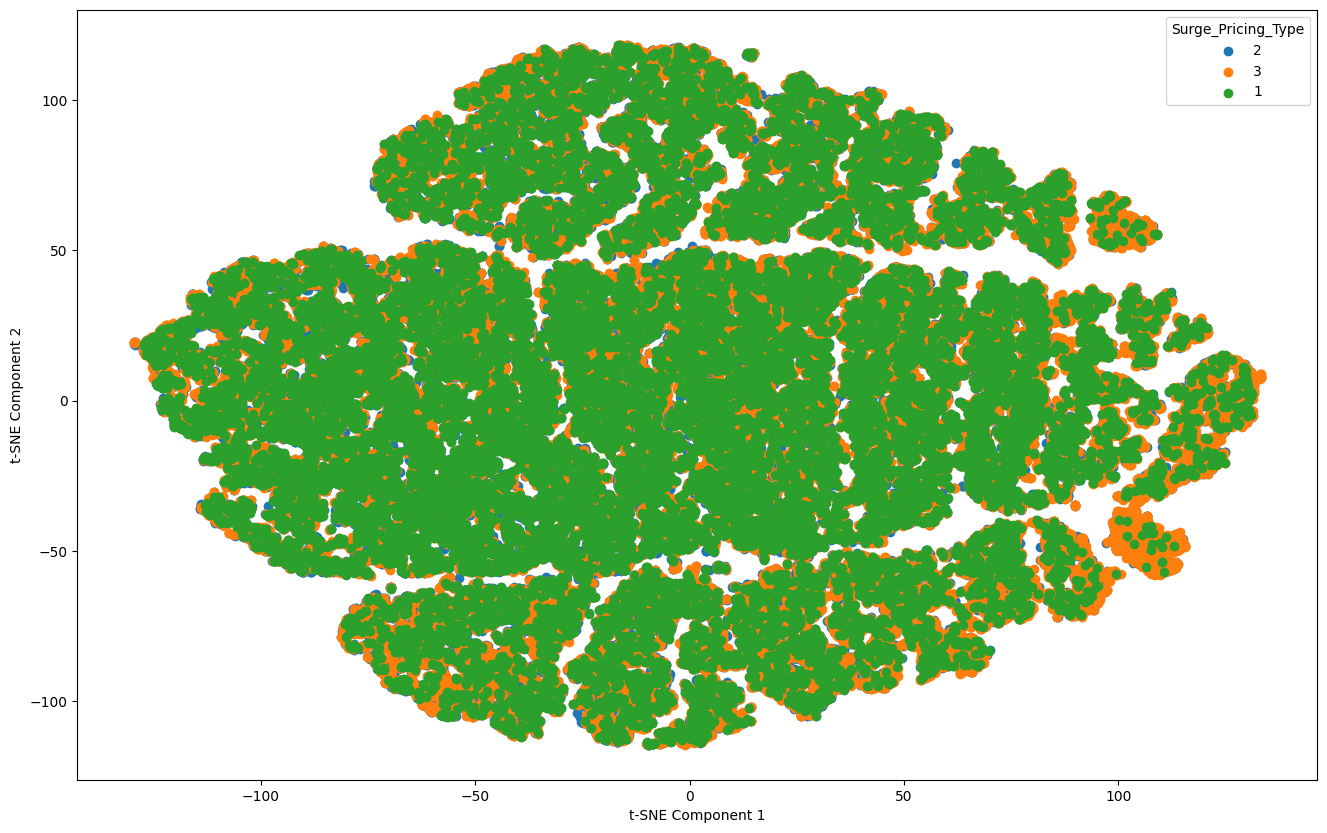

In [118]:
from sklearn.manifold import TSNE

### Your code is here

tsne_2d = TSNEResultVisualizer(X, y, n_components=2)
tsne_2d.plot_TSNE()


In [121]:
tsne_2d.tsne.embedding_

array([[-6.0361839e+01, -1.0159313e+02],
       [-6.4301825e+00, -9.3778427e+01],
       [ 4.7913632e+00, -1.8356649e+01],
       ...,
       [-7.4419389e+00, -1.6669596e-02],
       [ 2.2247374e+01, -8.2699814e+01],
       [-4.3079667e+00,  9.8604172e+01]], dtype=float32)

In [139]:
print_top_abs_correlations(df, 10)

Top Absolute Correlations:
                       Feature 1                      Feature 2  Correlation
0  Confidence_Life_Style_Index_B  Confidence_Life_Style_Index_C     0.565692
1                  Type_of_Cab_B                  Type_of_Cab_C     0.416698
2                  Type_of_Cab_D             Surge_Pricing_Type     0.333639
3                  Type_of_Cab_B                  Type_of_Cab_D     0.328262
4                Customer_Rating                           Var2     0.302968
5                  Type_of_Cab_B                  Type_of_Cab_E     0.248929
6                  Trip_Distance  Confidence_Life_Style_Index_B     0.227132
7                  Type_of_Cab_C                  Type_of_Cab_D     0.213962
8                  Trip_Distance                           Var2     0.200456
9                  Type_of_Cab_E             Surge_Pricing_Type     0.199537


In [136]:
df

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Type_of_Cab_B,Type_of_Cab_C,...,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Male,Surge_Pricing_Type
0,6.77,1.0,2.42769,3.90500,0,40.0,46,60,1,0,...,0,0,0,0,0,0,0,0,0,2
1,29.47,10.0,2.78245,3.45000,0,38.0,56,78,1,0,...,0,0,0,0,0,0,0,0,1,2
2,41.58,10.0,2.79805,3.50125,2,61.0,56,77,1,0,...,0,0,0,0,0,0,0,0,1,2
3,61.56,10.0,2.79805,3.45375,0,61.0,52,74,0,1,...,0,0,0,0,0,0,0,0,1,3
4,54.95,10.0,3.03453,3.40250,4,51.0,49,102,0,1,...,0,0,0,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131657,11.72,1.0,2.74229,3.28500,0,61.0,47,76,0,0,...,0,0,0,0,0,0,0,0,1,3
131658,74.81,7.0,2.81059,0.44500,0,61.0,63,88,0,1,...,0,0,0,0,0,0,0,0,1,2
131659,40.17,10.0,2.99565,3.33625,0,61.0,48,75,0,1,...,0,0,0,0,0,0,0,0,0,2
131660,46.88,4.0,3.04744,4.15750,1,47.0,54,79,1,0,...,0,0,0,0,0,0,0,0,1,2


In [138]:
remove_highly_correlated_features(df, 0.4)

,Trip_Distance,Customer_Since_Months,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Type_of_Cab_B,Type_of_Cab_C,Type_of_Cab_D,Type_of_Cab_E,...,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Male,Surge_Pricing_Type
0,6.77,1.0,3.90500,0,40.0,46,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,29.47,10.0,3.45000,0,38.0,56,1,0,0,0,...,0,0,0,0,0,0,0,0,1,2
2,41.58,10.0,3.50125,2,61.0,56,1,0,0,0,...,0,0,0,0,0,0,0,0,1,2
3,61.56,10.0,3.45375,0,61.0,52,0,1,0,0,...,0,0,0,0,0,0,0,0,1,3
4,54.95,10.0,3.40250,4,51.0,49,0,1,0,0,...,0,0,0,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131657,11.72,1.0,3.28500,0,61.0,47,0,0,1,0,...,0,0,0,0,0,0,0,0,1,3
131658,74.81,7.0,0.44500,0,61.0,63,0,1,0,0,...,0,0,0,0,0,0,0,0,1,2
131659,40.17,10.0,3.33625,0,61.0,48,0,1,0,0,...,0,0,0,0,0,0,0,0,0,2
131660,46.88,4.0,4.15750,1,47.0,54,1,0,0,0,...,0,0,0,0,0,0,0,0,1,2


**Задание 7.** Обучите t-sne с `n_components=3` на изначальных данных и визуализируйте результаты с учетом известных классов.

In [7]:
### Your code is here



Советуем обрезать датасет до маленького числа объектов (чтобы точки и их группки были хорошо различимы) и поиграться с гиперпараметрами класса Tsne! Обычно такая "игра" может привести к куда более красивым результатам по сравнению с теми, что получены с дефолтными настройками!